<a href="https://colab.research.google.com/github/su-zu-me/RF_Model_Tutorial/blob/main/rf_model_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install shap

     |████████████████████████████████| 358kB 6.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491629 sha256=0cbcb676bf8e50718a38c388768c2acbc54441194a3b383c8f03471a7feee8a0
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [5]:
import os
import shap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

In [6]:
from google.colab import files
src = list(files.upload().values())[0]

Saving Drug_fea_label.csv to Drug_fea_label.csv


In [7]:
file_name = 'Drug_fea_label.csv'  #csv file
ori_data = pd.read_csv(file_name) # save ori data and save as "pandas dataframe" format 
data = pd.read_csv(file_name)   # change some data type

In [8]:
X = data.drop(['DrugBank_ID', 'Label'], axis=1) # delete, axis=0 for delete sample, and 1 for column (key) 
y = data['Label'] # only remain type1 data
drug_info = data[['DrugBank_ID', 'Label']]

fea_name_list = list(X.columns) # save feature name list

#X_train, X_test, y_train, y_test, drug_info_train, drug_info_test = train_test_split(X, y, drug_info, test_size=0.2)  # split train and test dataset

In [9]:
rf_model = RandomForestClassifier(n_estimators=500, bootstrap=True, max_features='sqrt') # create random forest model parameters
rf_model.fit(X, y)  # train model by X_train data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
y_pred = rf_model.predict(X) # predict X_test

print('Accuracy: ', round(metrics.accuracy_score(y, y_pred), 3))  # calculate accuracy
print('MCC: ', round(metrics.matthews_corrcoef(y, y_pred), 3))   # calculate mcc

Accuracy:  0.995
MCC:  0.981


In [11]:
# output trees
"""
for i in range(5):
  
  estimator = rf_model.estimators_[i]
  
  export_graphviz(estimator, out_file='./tree_'+str(i)+'.dot',
                  feature_names = fea_name_list,
                  rounded = True, proportion = False,
                  precision = 2, filled = True)
  os.system('dot -Tpng ./tree_'+str(i)+'.dot -o ./tree_'+str(i)+'.png')
"""

"\nfor i in range(5):\n  \n  estimator = rf_model.estimators_[i]\n  \n  export_graphviz(estimator, out_file='./tree_'+str(i)+'.dot',\n                  feature_names = fea_name_list,\n                  rounded = True, proportion = False,\n                  precision = 2, filled = True)\n  os.system('dot -Tpng ./tree_'+str(i)+'.dot -o ./tree_'+str(i)+'.png')\n"

No handles with labels found to put in legend.


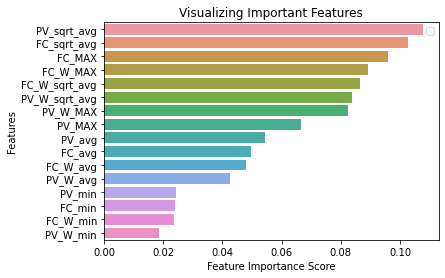

In [12]:
feature_imp = pd.Series(rf_model.feature_importances_, index=fea_name_list).sort_values(ascending=False)  # get feature importance score and sorting

sns_plot = sns.barplot(x=feature_imp[:20], y=feature_imp.index[:20])  # draw top20 important features
fig = sns_plot.get_figure()
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

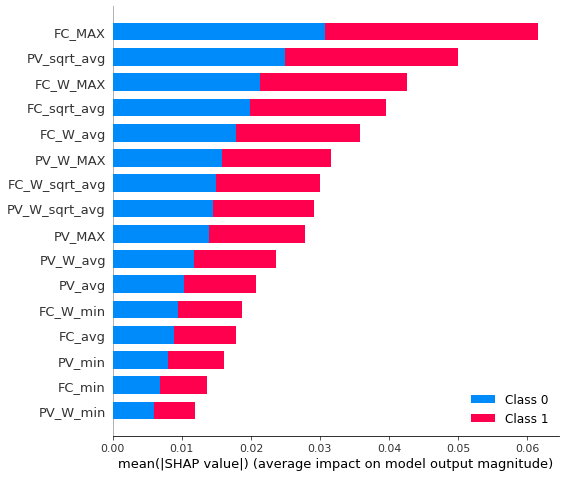

In [13]:
# Shapley Value

explainer = shap.TreeExplainer(rf_model)  # input rf_model to shap 
shap_values = explainer.shap_values(X)  # calculate shap value of X_train

shap.summary_plot(shap_values, X, plot_type="bar")  # draw figure
pd.DataFrame(shap_values[0]).to_csv('train_shap_class0_all.csv')
pd.DataFrame(shap_values[1]).to_csv('train_shap_class1_all.csv')